In [5]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer
import torch

In [18]:
model = AutoModelForQuestionAnswering.from_pretrained('./cuad-models/roberta-base/')
tokenizer = AutoTokenizer.from_pretrained('./cuad-models/roberta-base/', use_fast=False)

In [30]:
import json

with open('./cuad-data/data/CUADv1.json') as json_file:
    data = json.load(json_file)

In [52]:
data['data'][0]['paragraphs'][0]['qas'][2]['question']

'Highlight the parts (if any) of this contract related to "Agreement Date" that should be reviewed by a lawyer. Details: The date of the contract'

In [58]:
question = data['data'][0]['paragraphs'][0]['qas'][2]['question']

paragraph = '''EXHIBIT 10.6 DISTRIBUTOR AGREEMENT THIS DISTRIBUTOR AGREEMENT
(the "Agreement") is made by and between Electric City Corp., a Delaware corporation
("Company") and Electric City of Illinois LLC ("Distributor") this 7th day of September, 1999. RECITALS A.
'''

encoding = tokenizer.encode_plus(text=question, text_pair=paragraph)
inputs = encoding['input_ids']

outputs = model(input_ids=torch.tensor([inputs]))

start_scores = outputs.start_logits
end_scores = outputs.end_logits

start_index = torch.argmax(start_scores)
end_index = torch.argmax(end_scores)
answer = tokenizer.convert_tokens_to_string(tokens[start_index:end_index+1])
answer.strip()

'7th day of September, 1999.'

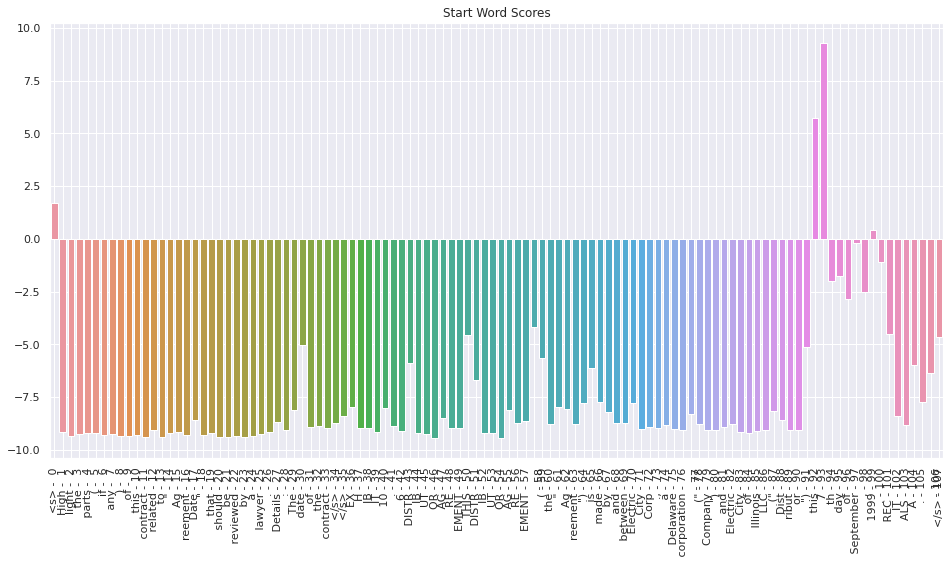

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
#sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (16,8)

# Pull the scores out of PyTorch Tensors and convert them to 1D numpy arrays.
s_scores = start_scores.detach().numpy().flatten()
e_scores = end_scores.detach().numpy().flatten()

# We'll use the tokens as the x-axis labels. In order to do that, they all need
# to be unique, so we'll add the token index to the end of each one.
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(tokenizer.convert_tokens_to_string(token), i))

# Create a barplot showing the start word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=s_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('Start Word Scores')

plt.show()


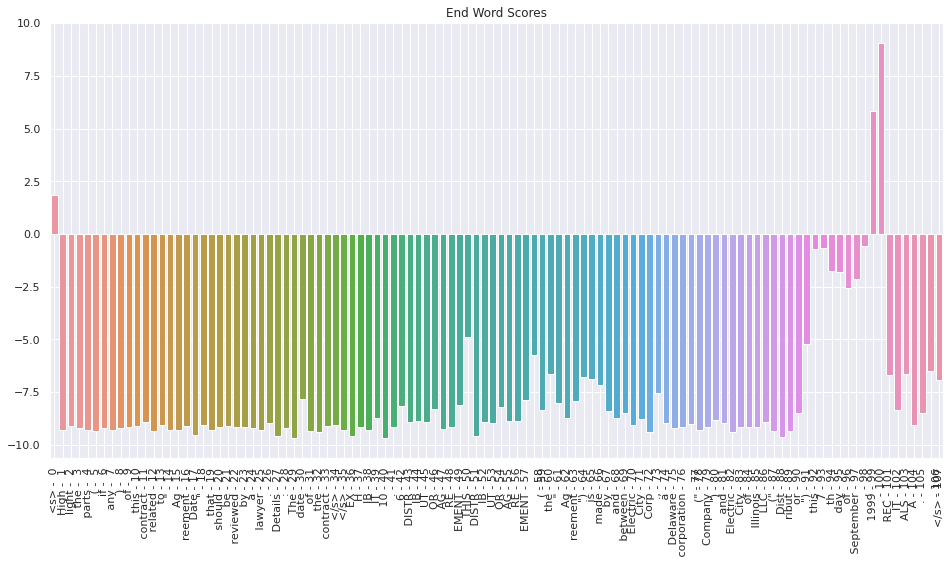

In [55]:
# Create a barplot showing the end word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=e_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('End Word Scores')

plt.show()
